In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

1


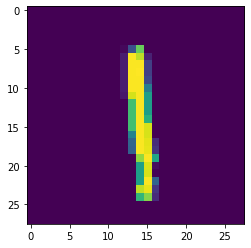

In [2]:
image_index = 8
print(y_train_orig[image_index]) 
plt.imshow(x_train_orig[image_index])

In [3]:
print(x_train_orig.shape)

x_train = x_train_orig.reshape(x_train_orig.shape[0], x_train_orig.shape[1], x_train_orig.shape[2], 1)
x_test = x_test_orig.reshape(x_test_orig.shape[0], x_test_orig.shape[1], x_test_orig.shape[2], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of examples in training set =', x_train.shape[0])
print('Number of examples in test set =', x_test.shape[0])

(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
Number of examples in training set = 60000
Number of examples in test set = 10000


In [4]:
model = Sequential()

#Conv2D: window 4*4 , stride 1, padding "same" , activation = "relu" 
model.add(Conv2D(32, kernel_size=(4,4),strides=(1,1), input_shape=x_train.shape[1:],padding="same",activation=tf.nn.relu))
#MaxPool2D : window 8*8, stride = 8 , padding "valid"
model.add(MaxPooling2D(pool_size=(8, 8),strides=(8,8),padding="valid"))

#Conv2D: window 2*2 , stride 1, padding "same" , activation = "relu"
model.add(Conv2D(64, kernel_size=(2,2),strides=(1,1),padding="same",activation=tf.nn.relu))
#MaxPool2D : window 3*3, stride = 3 , padding "valid"
model.add(MaxPooling2D(pool_size=(3,3),strides=(3,3),padding="valid"))

# Flatten_Dense_Network
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) 
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.2))

#Softmax Layer with 10 neurons in output layer
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
# using ADAM optimizer
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train_orig, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5378 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1615 - accuracy: 0.9531
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1245 - accuracy: 0.9638
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1018 - accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0891 - accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0794 - accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0739 - accuracy: 0.9788
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0658 - accuracy: 0.9809
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0594 - accuracy: 0.9825
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [7]:

Accuracy_test = model.evaluate(x_test, y_test_orig)
Accuracy_train = model.evaluate(x_train,y_train_orig)


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0344 - accuracy: 0.9890


In [8]:
print("\nTraining set accuracy = "+str(Accuracy_train[1]))
print("\nTest set accuracy = "+str(Accuracy_test[1]))



Training set accuracy = 0.9890166521072388

Test set accuracy = 0.9850999712944031
